In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

# load data from api

In [3]:
load_dotenv("../.env")

True

In [6]:
# create authorization headers
headers = {
    'Authorization': 'Bearer ' + os.getenv("API_SECRET_KEY")
}


df = pd.read_json(r'http://52.204.70.204:4000/api/dataset', storage_options=headers)

In [10]:
# count how many object in the data
print(df.count())


_id                 407
_date               407
_user               407
fm_avg_trk_time     259
fm_accuracy         259
vx_avg_res_time     302
vx_shot_accuracy    299
vx_trg_accuracy     299
au_avg_res_time     248
bm_HR_max            11
bm_HR_avg           127
bm_HR_var           129
bm_act_steps         76
bm_sleep            123
dtype: int64


In [6]:
df.head()

,_id,_date,_user,fm_avg_trk_time,fm_accuracy,vx_avg_res_time,vx_shot_accuracy,vx_trg_accuracy,au_avg_res_time,bm_HR_max,bm_HR_avg,bm_HR_var,bm_act_steps,bm_sleep
0,1,2024-02-22T12:29:53.000Z,jjj,5.12871,70.5882,2.61127,35.4839,45.8333,2655.41,189.0,NaN,NaN,NaN,NaN
1,2,2024-02-22T23:25:08.000Z,jjj,2.25510,92.3077,2.49034,50.8197,67.3913,1670.35,189.0,NaN,NaN,NaN,NaN
2,3,2024-02-23T08:11:41.000Z,jjj,2.52485,85.7143,2.59793,58.9286,78.5714,1738.97,NaN,NaN,NaN,NaN,NaN
3,4,2024-02-24T07:17:55.000Z,jjj,2.67675,85.7143,2.63325,48.4375,75.6098,2147.90,NaN,58.0,68.0,NaN,3.0
4,5,2024-02-25T07:18:46.000Z,jjj,2.95700,80.0000,2.01916,58.0645,83.7209,1875.10,NaN,59.0,60.0,NaN,3.0


In [13]:
print(df.columns)

Index(['_id', '_date', '_user', 'fm_avg_trk_time', 'fm_accuracy',
       'vx_avg_res_time', 'vx_shot_accuracy', 'vx_trg_accuracy',
       'au_avg_res_time', 'bm_HR_max', 'bm_HR_avg', 'bm_HR_var',
       'bm_act_steps', 'bm_sleep'],
      dtype='object')


In [14]:
df.shape

(407, 14)

In [15]:
df.isna().sum()

_id                   0
_date                 0
_user                 0
fm_avg_trk_time     148
fm_accuracy         148
vx_avg_res_time     105
vx_shot_accuracy    108
vx_trg_accuracy     108
au_avg_res_time     159
bm_HR_max           396
bm_HR_avg           280
bm_HR_var           278
bm_act_steps        331
bm_sleep            284
dtype: int64

In [16]:
# get columns with missing values
columns_with_missing_values  = df.columns[df.isnull().any()]
print(columns_with_missing_values)

Index(['fm_avg_trk_time', 'fm_accuracy', 'vx_avg_res_time', 'vx_shot_accuracy',
       'vx_trg_accuracy', 'au_avg_res_time', 'bm_HR_max', 'bm_HR_avg',
       'bm_HR_var', 'bm_act_steps', 'bm_sleep'],
      dtype='object')


In [17]:
# remove rows that we don't need
unNeededColumns = ['_id', '_date', '_user', 'bm_HR_max', 'bm_act_steps']
df.drop(unNeededColumns, axis=1, inplace=True)

In [18]:
df.head()

,fm_avg_trk_time,fm_accuracy,vx_avg_res_time,vx_shot_accuracy,vx_trg_accuracy,au_avg_res_time,bm_HR_avg,bm_HR_var,bm_sleep
0,5.12871,70.5882,2.61127,35.4839,45.8333,2655.41,NaN,NaN,NaN
1,2.25510,92.3077,2.49034,50.8197,67.3913,1670.35,NaN,NaN,NaN
2,2.52485,85.7143,2.59793,58.9286,78.5714,1738.97,NaN,NaN,NaN
3,2.67675,85.7143,2.63325,48.4375,75.6098,2147.90,58.0,68.0,3.0
4,2.95700,80.0000,2.01916,58.0645,83.7209,1875.10,59.0,60.0,3.0


In [19]:
df.columns

Index(['fm_avg_trk_time', 'fm_accuracy', 'vx_avg_res_time', 'vx_shot_accuracy',
       'vx_trg_accuracy', 'au_avg_res_time', 'bm_HR_avg', 'bm_HR_var',
       'bm_sleep'],
      dtype='object')

In [20]:
df.isna().sum()

fm_avg_trk_time     148
fm_accuracy         148
vx_avg_res_time     105
vx_shot_accuracy    108
vx_trg_accuracy     108
au_avg_res_time     159
bm_HR_avg           280
bm_HR_var           278
bm_sleep            284
dtype: int64

In [12]:
dfClean = df.dropna()
dfClean.shape

(2, 14)

In [16]:
dfClean.isna().sum()

fm_avg_trk_time     0
fm_accuracy         0
vx_avg_res_time     0
vx_shot_accuracy    0
vx_trg_accuracy     0
au_avg_res_time     0
bm_HR_avg           0
bm_HR_var           0
bm_sleep            0
dtype: int64

In [17]:
dfClean.head()


,fm_avg_trk_time,fm_accuracy,vx_avg_res_time,vx_shot_accuracy,vx_trg_accuracy,au_avg_res_time,bm_HR_avg,bm_HR_var,bm_sleep
3,2.67675,85.7143,2.63325,48.4375,75.6098,2147.90,58.0,68.0,3.0
4,2.95700,80.0000,2.01916,58.0645,83.7209,1875.10,59.0,60.0,3.0
6,2.05001,100.0000,2.04148,47.6190,68.1818,2211.87,61.0,77.0,3.0
8,9.32091,40.0000,2.74594,47.2222,62.9630,3254.95,59.0,71.0,4.0
10,2.24675,92.3077,1.94884,57.3770,70.0000,2017.87,60.0,61.0,4.0


In [18]:
X = dfClean.iloc[:, -3:]
X.head()

,bm_HR_avg,bm_HR_var,bm_sleep
3,58.0,68.0,3.0
4,59.0,60.0,3.0
6,61.0,77.0,3.0
8,59.0,71.0,4.0
10,60.0,61.0,4.0


In [19]:
y_fm_time = dfClean.iloc[:, 0:1]
y_fm_acc = dfClean.iloc[:, 1:2]
y_vx_time = dfClean.iloc[:, 2:3]
y_vx_shot_acc = dfClean.iloc[:, 3:4]
y_vx_trg_acc = dfClean.iloc[:, 4:5]
y_au_time = dfClean.iloc[:, 5:6]

In [20]:
# print mean standard variance of dfclean
print(dfClean.describe().transpose())

                  count         mean         std       min          25%  \
fm_avg_trk_time    79.0     2.890868    1.301346   1.25387     1.975465   
fm_accuracy        79.0    82.668257   11.700654  40.00000    75.000000   
vx_avg_res_time    79.0     2.099992    0.472160   1.35264     1.759530   
vx_shot_accuracy   79.0    52.965723    8.168995  39.13040    45.983050   
vx_trg_accuracy    79.0    84.036122    9.769384  55.55560    78.062500   
au_avg_res_time    79.0  2141.775443  701.327897   0.00000  1825.775000   
bm_HR_avg          79.0    65.379747    7.113194  53.00000    60.000000   
bm_HR_var          79.0    46.886076   14.940040  18.00000    36.500000   
bm_sleep           79.0     3.797468    1.212961   1.00000     3.000000   

                         50%          75%         max  
fm_avg_trk_time      2.39458     3.781050     9.32091  
fm_accuracy         85.71430    92.307700   100.00000  
vx_avg_res_time      2.00520     2.505755     3.10358  
vx_shot_accuracy    52.54

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


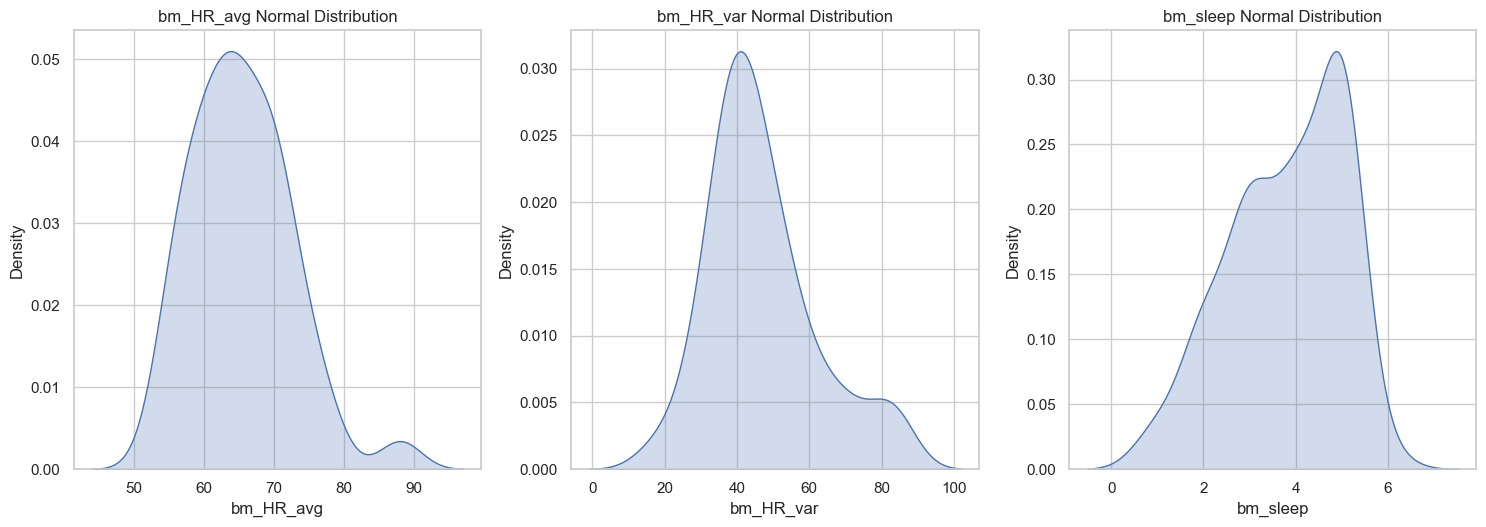

In [21]:
# print normal distribution of data all columns in subplots
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
for i, column in enumerate(dfClean.iloc[:, -3:]):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(data=dfClean[column], fill=True)
    plt.title(f'{column} Normal Distribution')
plt.tight_layout()
plt.show()

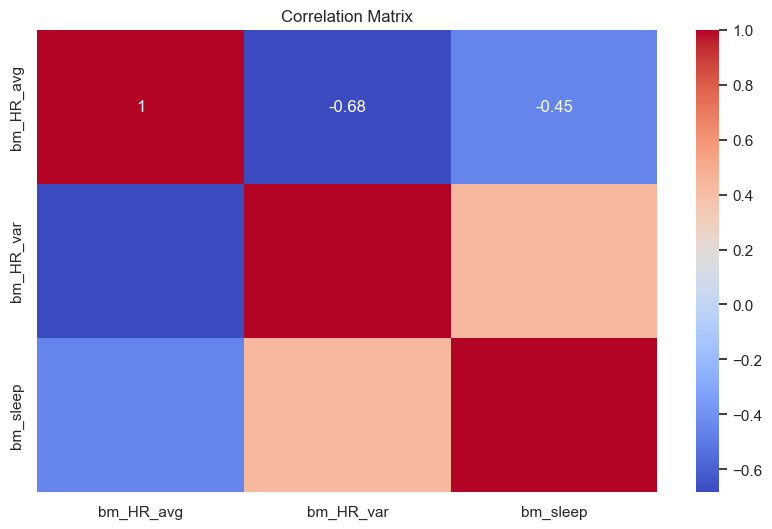

In [22]:
# print correlation matrix
corr = dfClean.iloc[:, -3:].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

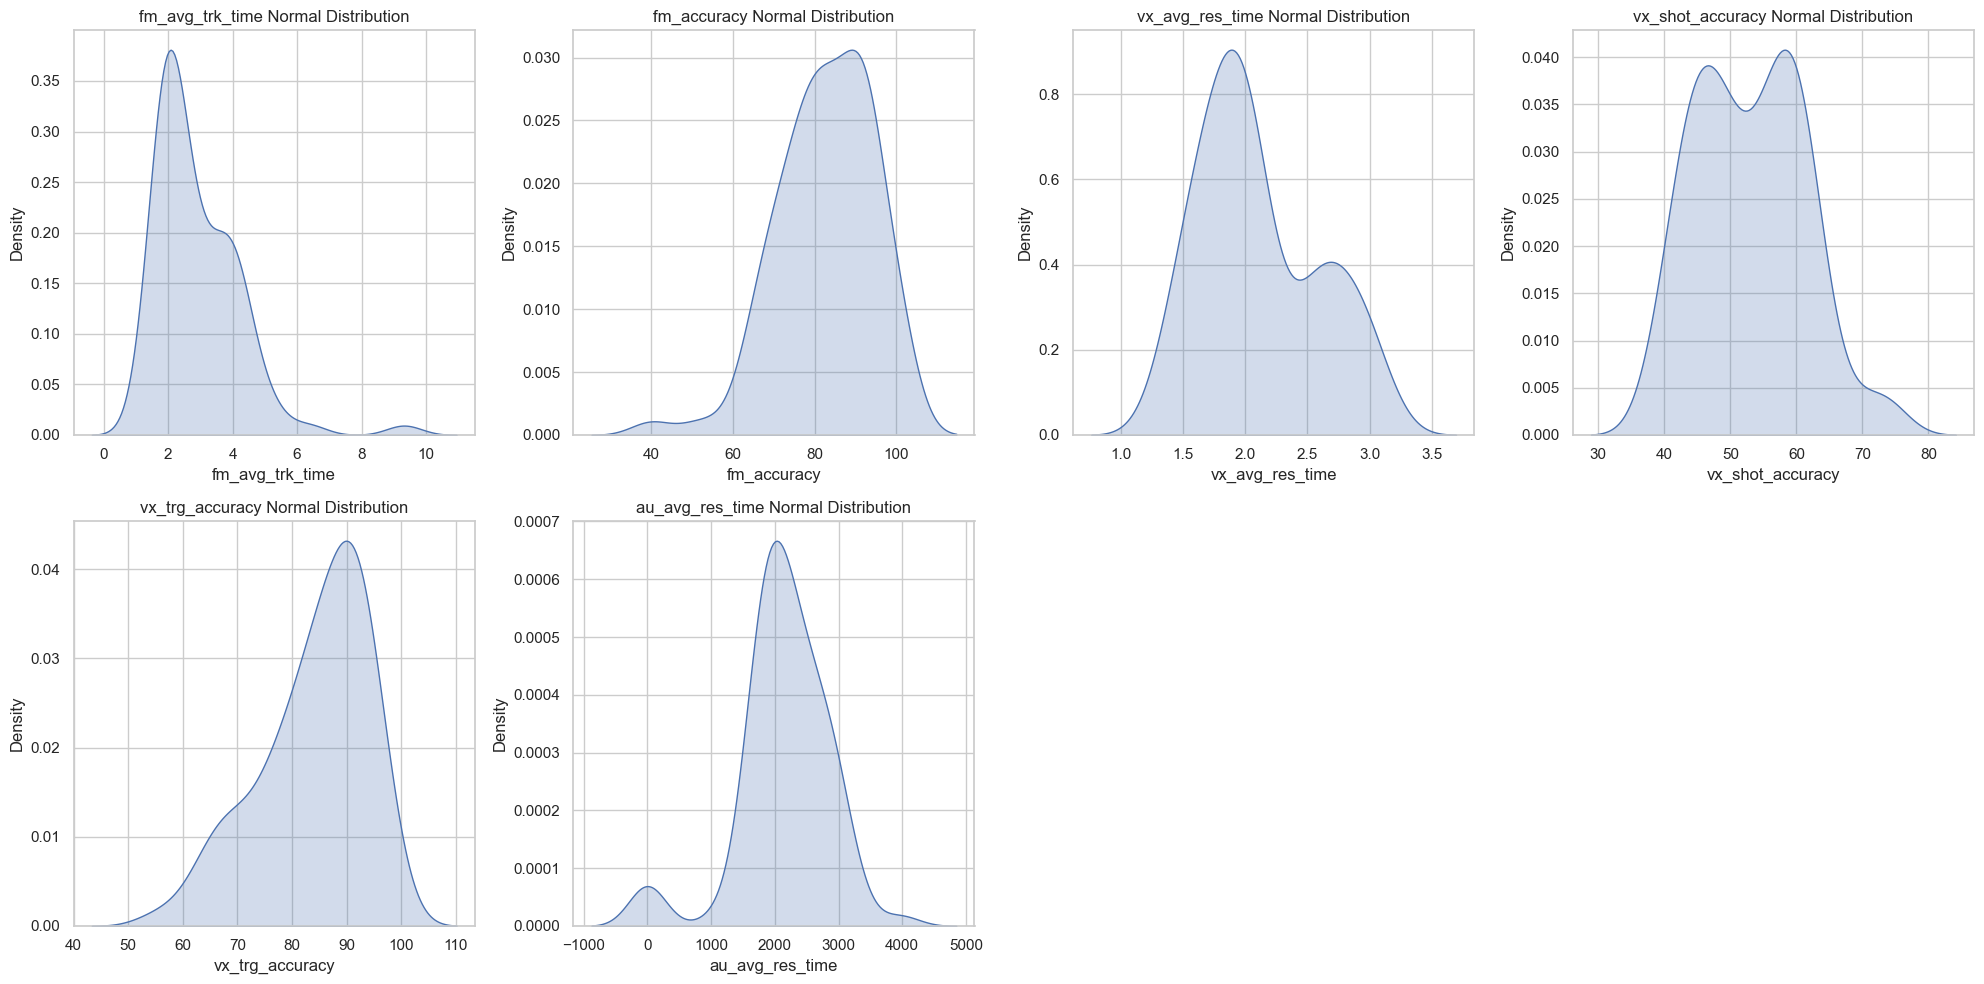

In [23]:
# plot y data using subplots
plt.figure(figsize=(20, 10))
for i, column in enumerate(dfClean.iloc[:, 0:6]):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(data=dfClean[column], fill=True)
    plt.title(f'{column} Normal Distribution')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y_fm_time_scaled = scaler.fit_transform(y_fm_time)
y_fm_acc_scaled = scaler.fit_transform(y_fm_acc)
y_vx_time_scaled = scaler.fit_transform(y_vx_time)
y_vx_shot_acc_scaled = scaler.fit_transform(y_vx_shot_acc)
y_vx_trg_acc_scaled = scaler.fit_transform(y_vx_trg_acc)
y_au_time_scaled = scaler.fit_transform(y_au_time)


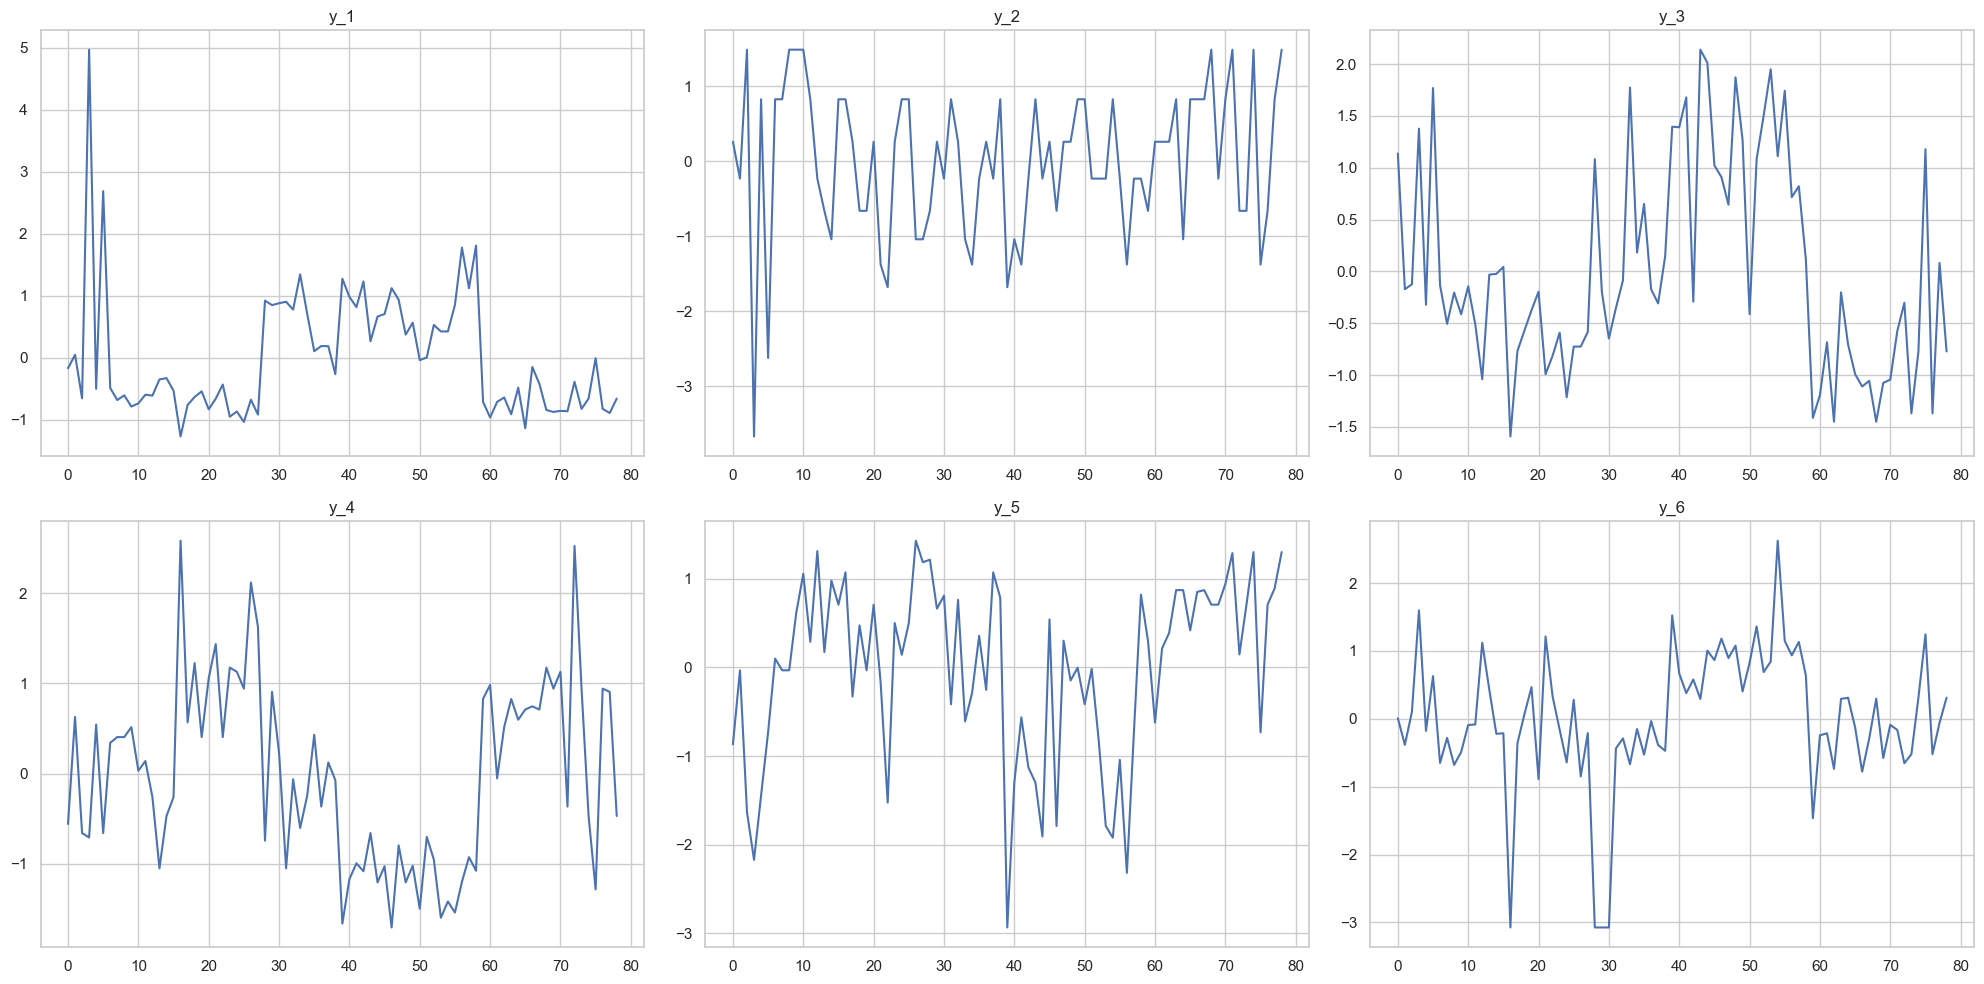

In [25]:
# plot scaled data using subplots sns.kdeplot
plt.figure(figsize=(20, 10))
for i, y in enumerate([y_fm_time_scaled, y_fm_acc_scaled, y_vx_time_scaled, y_vx_shot_acc_scaled, y_vx_trg_acc_scaled, y_au_time_scaled]):
    plt.subplot(2, 3, i+1)
    plt.plot(y)
    plt.title(f'y_{i+1}')
plt.tight_layout()
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# linear regression
from sklearn.linear_model import LinearRegression

In [27]:
# Split the data
X_train, X_test, y_fm_time_train, y_fm_time_test, y_fm_acc_train, y_fm_acc_test, y_vx_time_train, y_vx_time_test, y_vx_shot_acc_train, y_vx_shot_acc_test, y_vx_trg_acc_train, y_vx_trg_acc_test, y_au_time_train, y_au_time_test = train_test_split(X, y_fm_time_scaled, y_fm_acc_scaled, y_vx_time_scaled, y_vx_shot_acc_scaled, y_vx_trg_acc_scaled, y_au_time_scaled, test_size=0.2, random_state=4217)


In [28]:
# Define parameter grids for each model
param_grid_lr = {'clf__fit_intercept': [True, False]}
param_grid_svm = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']}
param_grid_rf = {'clf__n_estimators': [50, 100, 200], 'clf__max_depth': [None, 10, 20]}
param_grid_knn = {'clf__n_neighbors': [3, 5, 7], 'clf__weights': ['uniform', 'distance']}

In [29]:
# Create pipelines for each model with scaling
pipe_lr = Pipeline([('scaler', StandardScaler()), ('clf', LinearRegression())])
pipe_svm = Pipeline([('scaler', StandardScaler()), ('clf', SVR())])
pipe_rf = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestRegressor())])
pipe_knn = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsRegressor())])


In [30]:
# Create parameter grids dictionary for each model
param_grids = {
    'lr': (pipe_lr, param_grid_lr),
    'svm': (pipe_svm, param_grid_svm),
    'rf': (pipe_rf, param_grid_rf),
    'knn': (pipe_knn, param_grid_knn)
}

In [31]:
# mean squared error
from sklearn.metrics import mean_squared_error

# Function to fit models and evaluate
def fit_models_and_evaluate(X_train, X_test, y_train, y_test):
    results = {}
    for model_name, (pipe, param_grid) in param_grids.items():
        grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results[model_name] = {
            'best_params': grid_search.best_params_,
            'best_score': -grid_search.best_score_,  # Convert back to positive MSE
            'test_mse': mse
        }
    return results

In [32]:
# Define a function to plot results
def plot_results(results, y_variable):
    labels = list(results.keys())
    test_mses = [result['test_mse'] for result in results.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, test_mses, color=['blue', 'green', 'red', 'purple'])
    plt.xlabel('Models')
    plt.ylabel('Test MSE')
    plt.title(f'Test MSE of Models for {y_variable}')
    plt.show()

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was pass

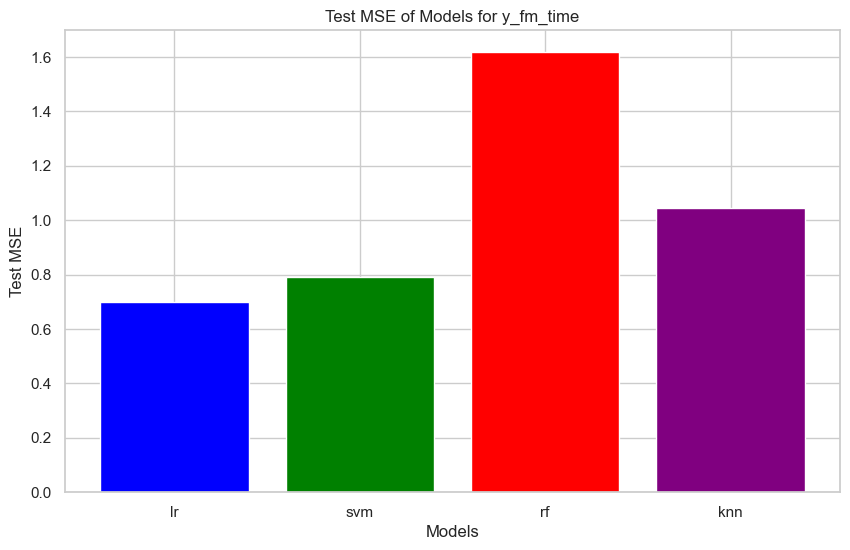

In [33]:
# Fit models and evaluate for y_fm_time
results_fm_time = fit_models_and_evaluate(X_train, X_test, y_fm_time_train, y_fm_time_test)
plot_results(results_fm_time, 'y_fm_time')

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was pass

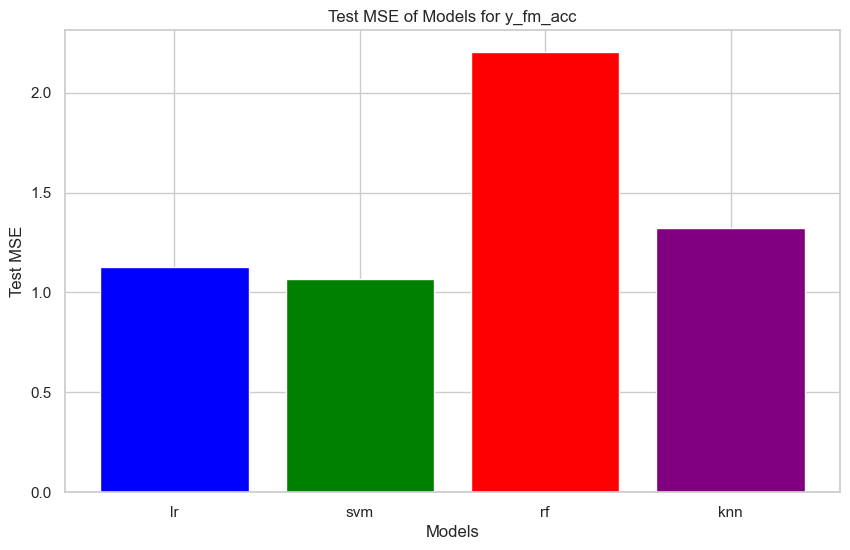

In [34]:
# Fit models and evaluate for y_fm_acc
results_fm_acc = fit_models_and_evaluate(X_train, X_test, y_fm_acc_train, y_fm_acc_test)
plot_results(results_fm_acc, 'y_fm_acc')

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was pass

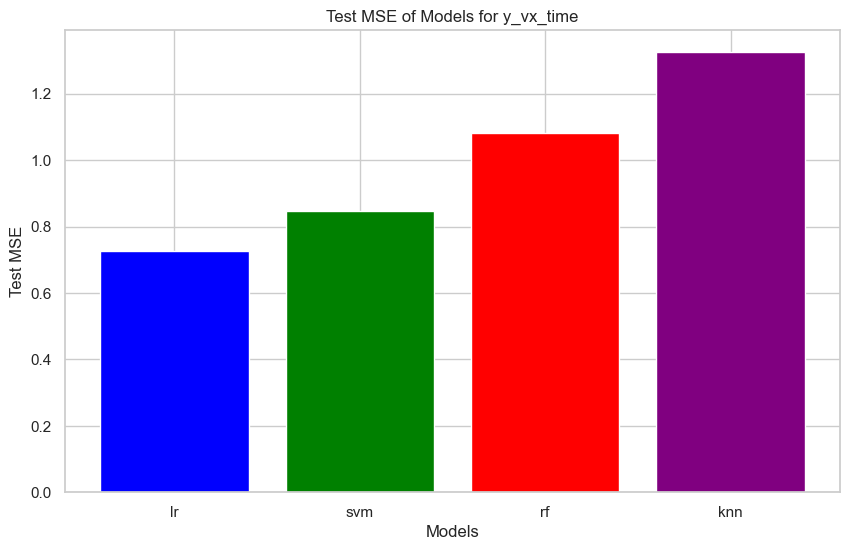

In [35]:
# Fit models and evaluate for y_vx_time
results_vx_time = fit_models_and_evaluate(X_train, X_test, y_vx_time_train, y_vx_time_test)
plot_results(results_vx_time, 'y_vx_time')

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was pass

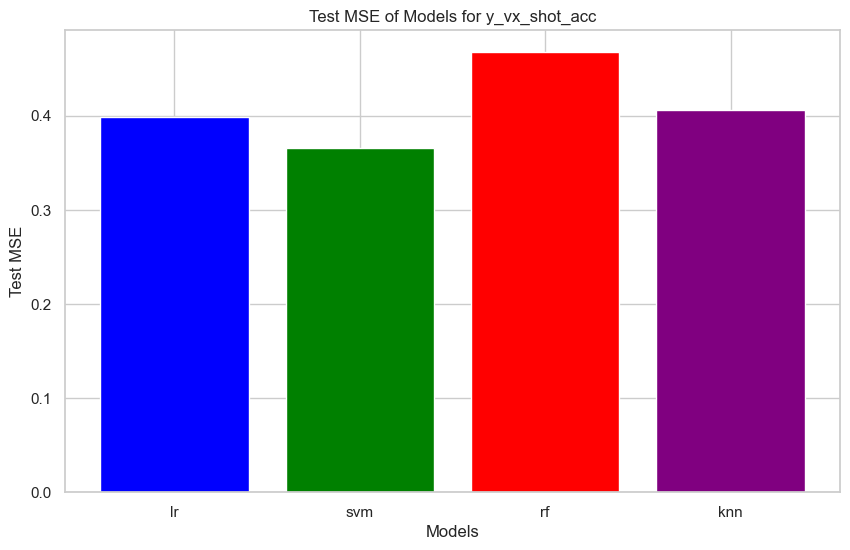

In [36]:
# Fit models and evaluate for y_vx_shot_acc
results_vx_shot_acc = fit_models_and_evaluate(X_train, X_test, y_vx_shot_acc_train, y_vx_shot_acc_test)
plot_results(results_vx_shot_acc, 'y_vx_shot_acc')

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was pass

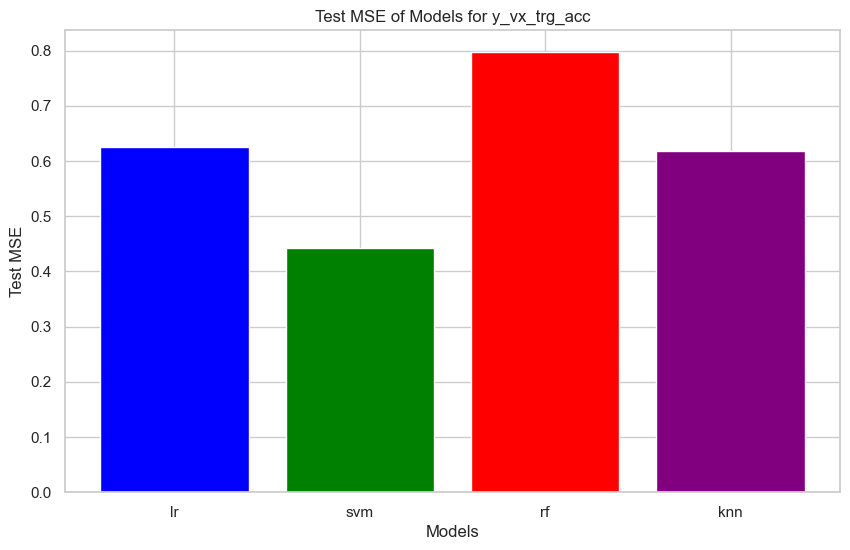

In [37]:
# Fit models and evaluate for y_vx_trg_acc
results_vx_trg_acc = fit_models_and_evaluate(X_train, X_test, y_vx_trg_acc_train, y_vx_trg_acc_test)
plot_results(results_vx_trg_acc, 'y_vx_trg_acc')

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was pass

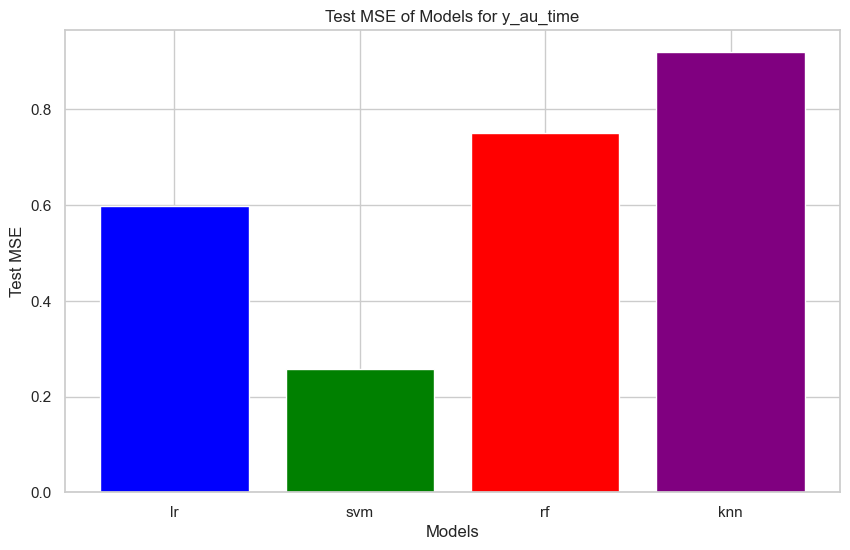

In [38]:
# Fit models and evaluate for y_au_time
results_au_time = fit_models_and_evaluate(X_train, X_test, y_au_time_train, y_au_time_test)
plot_results(results_au_time, 'y_au_time')

In [39]:
# Define a function to extract the best model for each variable
def get_best_model(results):
    best_models = {}
    for variable, result in results.items():
        best_model_name = max(result, key=lambda x: result[x]['test_mse'])
        best_models[variable] = (best_model_name, result[best_model_name]['best_params'])
    return best_models

In [40]:
# Extract the best models for each variable
best_models = get_best_model({
    'y_fm_time': results_fm_time,
    'y_fm_acc': results_fm_acc,
    'y_vx_time': results_vx_time,
    'y_vx_shot_acc': results_vx_shot_acc,
    'y_vx_trg_acc': results_vx_trg_acc,
    'y_au_time': results_au_time
})

In [41]:
# Define a function to plot actual vs. predicted values
def plot_actual_vs_predicted(X_test, y_test, best_model, variable):
    model_name, best_params = best_model
    pipe, _ = param_grids[model_name]
    pipe.set_params(**best_params)
    
    # Ensure y_test is a 1D array
    y_test = np.ravel(y_test)
    
    pipe.fit(X_train, globals()[f'{variable}_train'])
    y_pred = pipe.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    plt.plot(y_test, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Actual vs Predicted for {variable} - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


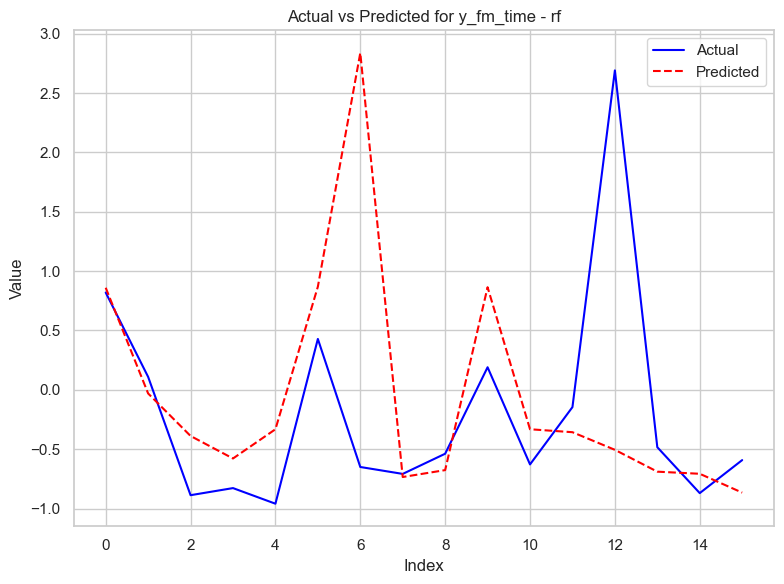

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


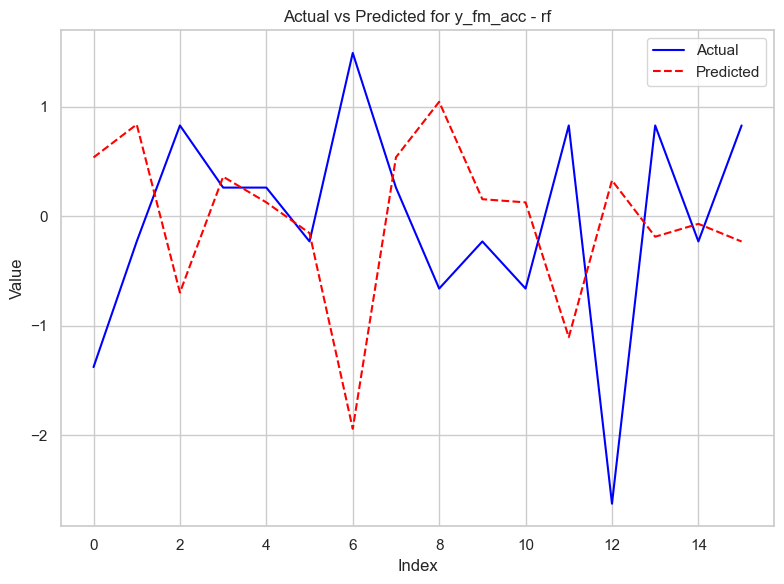

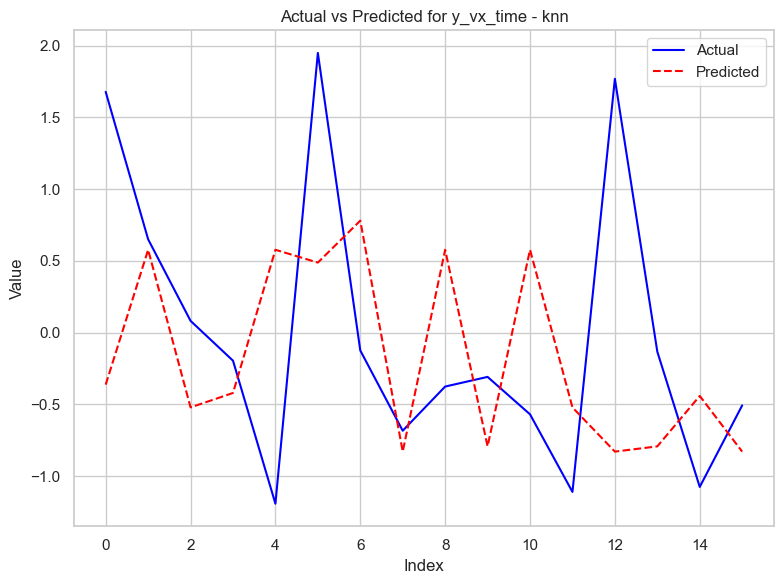

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


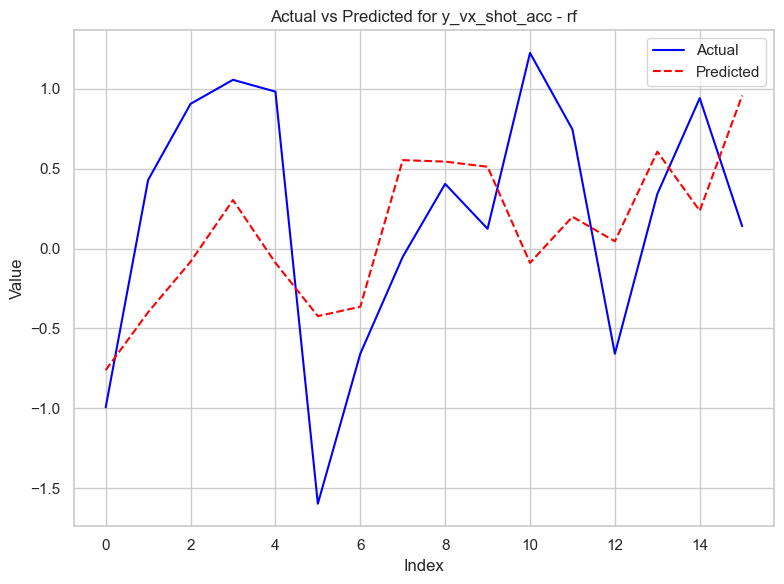

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


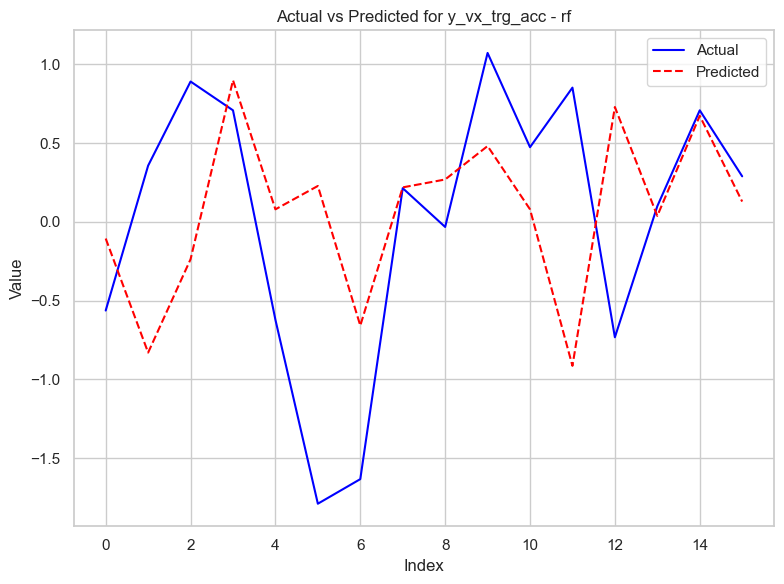

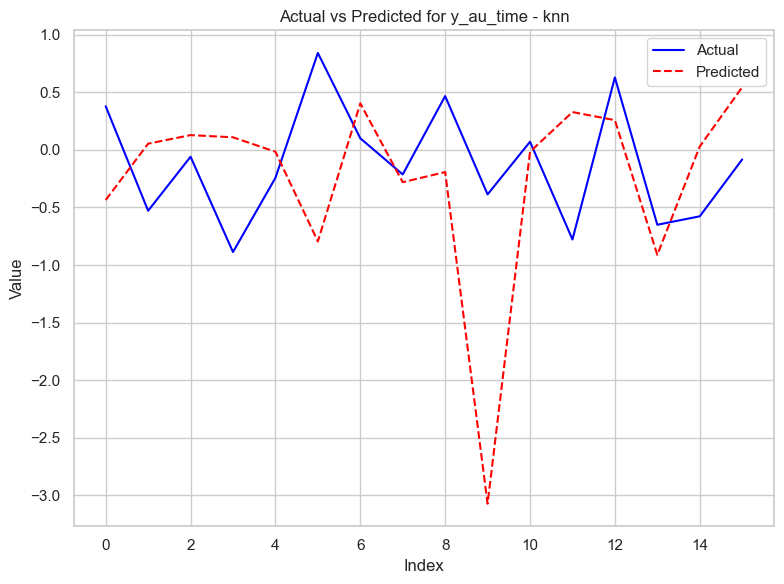

In [42]:
# Plot actual vs. predicted values for each variable
for variable, best_model in best_models.items():
    plot_actual_vs_predicted(X_test, globals()[f'{variable}_test'], best_model, variable)

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


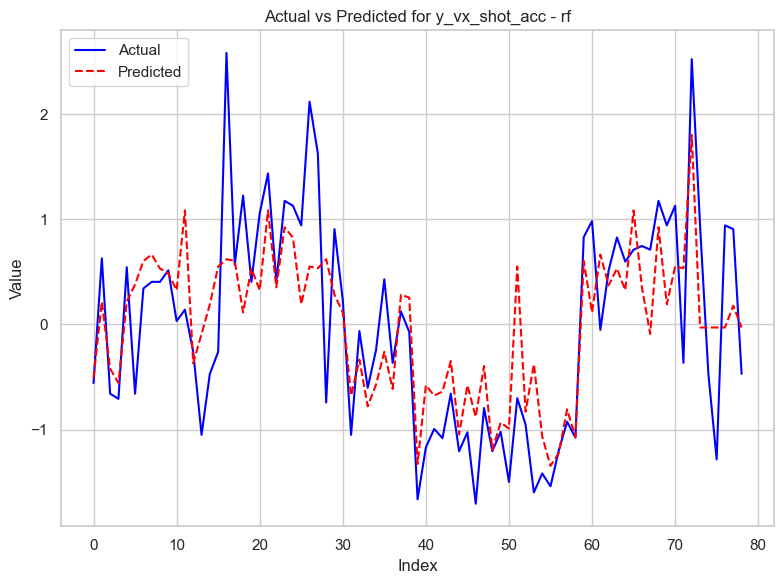

In [43]:
# predict y_vx_shot_acc using all data
best_model_vx_shot_acc = best_models['y_vx_shot_acc']
plot_actual_vs_predicted(X, y_vx_shot_acc_scaled, best_model_vx_shot_acc, 'y_vx_shot_acc')


In [44]:
# show mean squared error for each model
print(results_fm_time)
print(results_fm_acc)
print(results_vx_time)
print(results_vx_shot_acc)
print(results_vx_trg_acc)
print(results_au_time)


{'lr': {'best_params': {'clf__fit_intercept': False}, 'best_score': 1.0172868329776779, 'test_mse': 0.6994157130192058}, 'svm': {'best_params': {'clf__C': 1, 'clf__kernel': 'rbf'}, 'best_score': 0.9868915268208314, 'test_mse': 0.7915617329343332}, 'rf': {'best_params': {'clf__max_depth': None, 'clf__n_estimators': 100}, 'best_score': 0.9433767320048478, 'test_mse': 1.6171719607818376}, 'knn': {'best_params': {'clf__n_neighbors': 7, 'clf__weights': 'distance'}, 'best_score': 1.0258168130157324, 'test_mse': 1.0437239113402812}}
{'lr': {'best_params': {'clf__fit_intercept': False}, 'best_score': 1.1629938272220872, 'test_mse': 1.1282703998537957}, 'svm': {'best_params': {'clf__C': 0.1, 'clf__kernel': 'rbf'}, 'best_score': 1.0772251688183165, 'test_mse': 1.069074789959395}, 'rf': {'best_params': {'clf__max_depth': 10, 'clf__n_estimators': 200}, 'best_score': 1.5579049716384534, 'test_mse': 2.202224026213387}, 'knn': {'best_params': {'clf__n_neighbors': 7, 'clf__weights': 'uniform'}, 'best_

In [45]:
# show r2 score for each model
from sklearn.metrics import r2_score

def r2_score_models(X, y, best_models):
    r2_scores = {}
    for variable, best_model in best_models.items():
        model_name, best_params = best_model
        pipe, _ = param_grids[model_name]
        pipe.set_params(**best_params)
        pipe.fit(X_train, globals()[f'{variable}_train'])
        y_pred = pipe.predict(X)
        r2_scores[variable] = r2_score(y, y_pred)
    return r2_scores

r2_scores = r2_score_models(X, y_vx_shot_acc_scaled, best_models)
r2_scores

C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed whe

{'y_fm_time': -1.5164610523097175,
 'y_fm_acc': -0.058064352850356604,
 'y_vx_time': -0.9587029181033941,
 'y_vx_shot_acc': 0.5850791680854974,
 'y_vx_trg_acc': 0.12271482339767414,
 'y_au_time': -1.881307964449618}

In [46]:
# split the data using scaled data
from sklearn.model_selection import train_test_split


# split the data
X_train, X_test, y_fm_time_train, y_fm_time_test, y_fm_acc_train, y_fm_acc_test, y_vx_time_train, y_vx_time_test, y_vx_shot_acc_train, y_vx_shot_acc_test, y_vx_trg_acc_train, y_vx_trg_acc_test, y_au_time_train, y_au_time_test = train_test_split(X, y_fm_time_scaled, y_fm_acc_scaled, y_vx_time_scaled, y_vx_shot_acc_scaled, y_vx_trg_acc_scaled, y_au_time_scaled, test_size=0.2, random_state=4217)


In [47]:
# print the shape of the data
print(X_train.shape, X_test.shape, y_fm_time_train.shape, y_fm_time_test.shape, y_fm_acc_train.shape, y_fm_acc_test.shape, y_vx_time_train.shape, y_vx_time_test.shape, y_vx_shot_acc_train.shape, y_vx_shot_acc_test.shape, y_vx_trg_acc_train.shape, y_vx_trg_acc_test.shape, y_au_time_train.shape, y_au_time_test.shape)

(63, 3) (16, 3) (63, 1) (16, 1) (63, 1) (16, 1) (63, 1) (16, 1) (63, 1) (16, 1) (63, 1) (16, 1) (63, 1) (16, 1)


In [48]:
# # split the data
# from sklearn.model_selection import train_test_split

# # split the data using all the y values
# X_train, X_test, y_fm_time_train, y_fm_time_test, y_fm_acc_train, y_fm_acc_test, y_vx_time_train, y_vx_time_test, y_vx_shot_acc_train, y_vx_shot_acc_test, y_vx_trg_acc_train, y_vx_trg_acc_test, y_au_time_train, y_au_time_test = train_test_split(X, y_fm_time, y_fm_acc, y_vx_time, y_vx_shot_acc, y_vx_trg_acc, y_au_time, test_size=0.2, random_state=4217)


In [49]:
# X_train.shape, X_test.shape, y_fm_time_train.shape, y_fm_time_test.shape, y_fm_acc_train.shape, y_fm_acc_test.shape, y_vx_time_train.shape, y_vx_time_test.shape, y_vx_shot_acc_train.shape, y_vx_shot_acc_test.shape, y_vx_trg_acc_train.shape, y_vx_trg_acc_test.shape, y_au_time_train.shape, y_au_time_test.shape

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [51]:
# setup parameters for grid search
param_grid = [
    {
        'scaler' : [StandardScaler(), MinMaxScaler()],
        'regressor' : [LogisticRegression()],
        'regressor__penalty' : ['l1', 'l2'],
        'regressor__C' : np.logspace(-4, 4, 5),
        'regressor__solver' : ['liblinear'],
      },
    {
          'scaler' : [StandardScaler(), MinMaxScaler()],
          'regressor' : [SVR()],
          'regressor__C' : np.logspace(-4, 4, 5),
          'regressor__gamma' : np.logspace(-1, 1, 8),
    #     'regressor__kernel' : ['linear', 'rbf']
      },
      {
          'scaler' : [StandardScaler(), MinMaxScaler()],
          'regressor' : [KNeighborsRegressor()],
          'regressor__n_neighbors' : list(range(2, 3, 1)),
  
     }
]
 

In [52]:
# create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LogisticRegression())
])

In [53]:
# create a grid search
gs_fm_acc = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
%time gs_fm_acc.fit(X_train, y_fm_acc_train.ravel())

Fitting 5 folds for each of 102 candidates, totalling 510 fits
CPU times: total: 266 ms
Wall time: 4.59 s


C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 510.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rodri\AppData\Roaming\Python\Python311\sit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'regressor': [LogisticRegression()],
                          'regressor__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                          'regressor__penalty': ['l1', 'l2'],
                          'regressor__solver': ['liblinear'],
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'regressor': [SVR()],
                          'regressor__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                          'regressor__gamma': array([ 0.1       ,  0.19306977,  0.37275937,  0.71968567,  1.38949549,
        2.6826958 ,  5.17947468, 10.        ]),
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'regressor': [KNeighborsRegressor()],
                          'regressor__n_neighbors': [2],
                          'scaler': [StandardScaler(), MinMaxScaler()]}],
             verbose=1)

In [54]:
gs_fm_acc.best_params_

{'regressor': SVR(),
 'regressor__C': 1.0,
 'regressor__gamma': 0.1,
 'scaler': MinMaxScaler()}

In [55]:
# print the best score
gs_fm_acc.best_score_

-0.08289524125127132

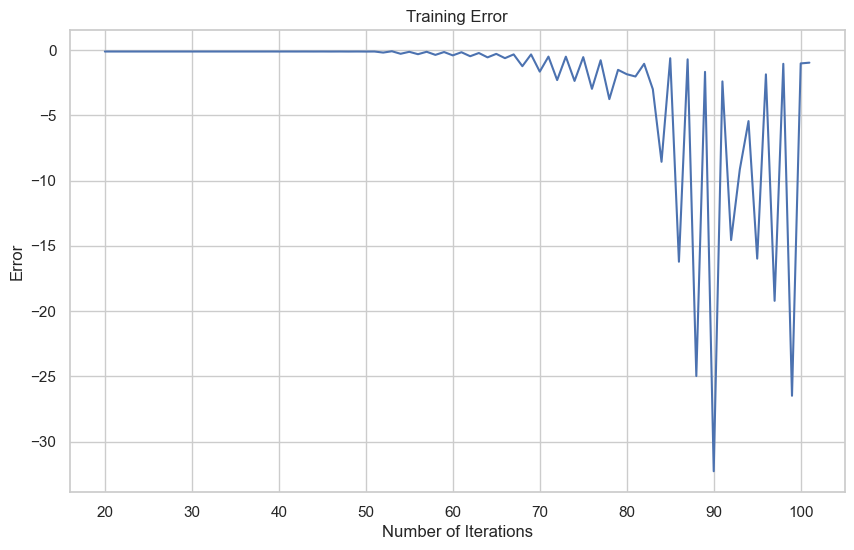

In [56]:
# plot training error of best estimator
plt.figure(figsize=(10, 6))
plt.plot(gs_fm_acc.cv_results_['mean_test_score'])
plt.title('Training Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.show()



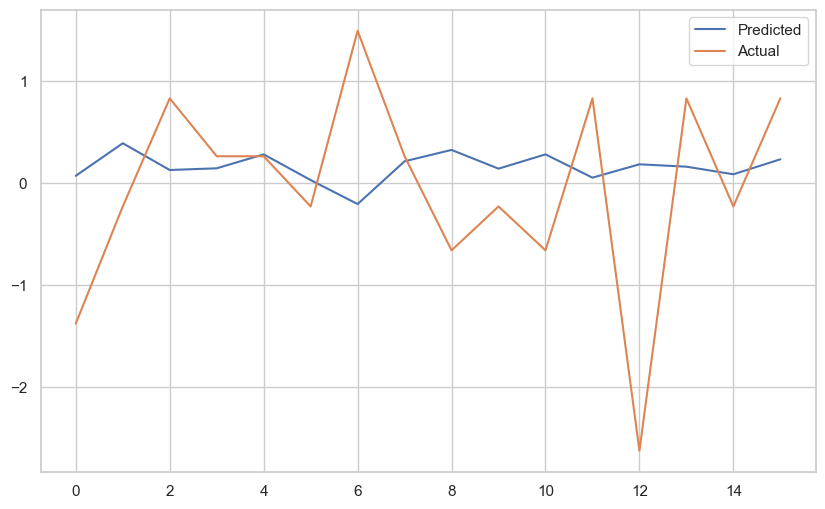

In [57]:
gs_fm_acc.score(X_test, y_fm_acc_test)
# plot the best estimator
plt.figure(figsize=(10, 6))
plt.plot(gs_fm_acc.best_estimator_.predict(X_test), label='Predicted')
plt.plot(y_fm_acc_test, label='Actual')
plt.legend()


In [58]:
app = Flask(__name__)
CORS(app)

# Global variable to keep track of the current image index
current_image_index = 0

# Function to get the next image filename
def get_next_image():
    global current_image_index
    image_folder = r'C:\Users\rodri\repos\exec_dash\images'
    images = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    if current_image_index < len(images):
        next_image = images[current_image_index]
        current_image_index += 1
        return next_image
    else:
        # Reset the index when all images are displayed
        current_image_index = 0
        if images:
            return images[current_image_index]
        else:
            return None

# Route to serve the next image
@app.route('/')
def serve_next_image():
    next_image = get_next_image()
    if next_image:
        return f'''
            <html>
                <head>
                    <style>
                        img {{
                            width: 1000px; /* Set width to your desired size */
                            height: auto; /* Maintain aspect ratio */
                        }}
                    </style>
                </head>
                <body>
                    <img src="/images/{next_image}" alt="{next_image}">
                    <br>
                    <a href="/">Next Image</a>
                </body>
            </html>
        '''
    else:
        return "No images found."

# Route to serve individual image
@app.route('/images/<path:filename>')
def serve_image(filename):
    print("Request received for:", filename)
    return send_from_directory(r'C:\Users\rodri\repos\exec_dash\images', filename)

# Run the Flask application
if __name__ == '__main__':
    app.run(port=5000)

NameError: name 'Flask' is not defined